# B-Spline Interpretation Project
## What is Interpolation?
Interpolation is a statistical method of extracting unknown values from a set of known values. The simplest version of interpolation is Linear Interpolation. Linear interpolation takes a given value of a function f(x) at two points and extracts another function from another point x that is in-between the given two points. 

$ \begin{equation} f(x) = \frac{f_2 - f_1}{x_2 - x_1}(x - x_1) + f_1. \end{equation}$

This computation recovers the function values at the end points. Now applying this to an example in code:


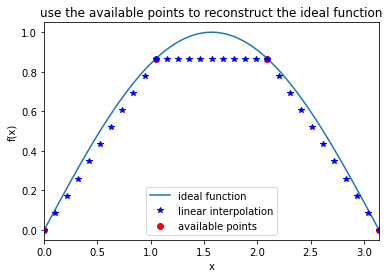

In [27]:
# Let's start with a simple example
import matplotlib.pyplot as plt
import numpy as np
from scipy import interpolate as spi
from scipy.interpolate import BSpline
from math import pi

f = lambda x: np.sin(x) 
x_min, x_max = 0, pi
npt0 = 100 #ideal function
npt1 = 4   #available points
npt2 = 10  #number of points you want to interpolate bewteen two known points

x0 = np.linspace(x_min, x_max, npt0) #ideal function
x1 = np.linspace(x_min, x_max, npt1) #available points


#---------To interpolate based on the available points

x2 = []
y2 = []

for i in range(npt1-1):
    slope = (f(x1[i+1])-f(x1[i]))/(x1[i+1]-x1[i])
    delta = (x1[i+1]-x1[i])/npt2
    for j in range(npt2+1):
        x2.append(x1[i]+delta*j)
        y2.append(f(x1[i]) + slope*delta*j)
#---------To interpolate based on the available points



#plot all points
plt.plot(x0,f(x0),label='ideal function')
plt.scatter(x1,f(x1), color='r', label='available points')
plt.plot(x2,y2, '*b', label='linear interpolation')

plt.legend()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.xlim([0,pi])
plt.title('use the available points to reconstruct the ideal function')
plt.show()

The above function shows the use of linear interpolation on a quadratic example. The approximation fails as the function becomes less linear, meaning there is a better way to interpolate without as many errors. This introduces **spline interpolation.**

## Spline Interpolation
Spline interpolation is used when the interpolant is a special type of piecewise polynomial called a spline. The term spline refers to a wide range of functions that are used to interpolate or smooth data. A spline is defined by **control points** and **knots**. Control points are points that directly influence the shape of the interpolated function. They act similar to vertices. Knots are defined by the connection points of successive polynomials on the x-axis. The number of knots will always equal the number of control points plus curve degree plus one (t = n + k + 1). Interpolating splines are typically used as the minimizers of measures of roughness. Spline functions are typically found to be finite-dimensional in nature, making them useful in different computations. These splines are simple to construct and are an easy means to accurately evaluate and approximate complex shapes. Spline interpolation takes these splines, ie multiple low-degree polynomials, and fits them to small subsets of values. The following example will show how to improve the above linear interpolation example by interpreting it as a quadratic spline interpolation: 

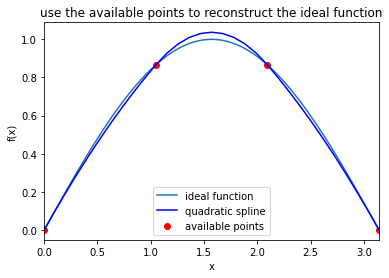

In [13]:
# Let's start with a simple example
import matplotlib.pyplot as plt
import numpy as np
from math import pi

f = lambda x: np.sin(x) 
x_min, x_max = 0, pi
npt0 = 100 #ideal function
npt1 = 4   #available points
npt2 = 10  #number of points you want to interpolate bewteen two known points

x0 = np.linspace(x_min, x_max, npt0) #ideal function
x1 = np.linspace(x_min, x_max, npt1) #available points


#---------To interpolate based on the available points
x2 = []
y2 = []
z = np.empty(npt1)
z[0] = 1    # try to play with different values here

for i in range(npt1-1):
    slope = (f(x1[i+1])-f(x1[i]))/(x1[i+1]-x1[i])
    delta = (x1[i+1]-x1[i])/npt2
    z[i+1] = -z[i] + 2*slope


    for j in range(npt2+1):
        x2.append(x1[i]+delta*j)
        y2.append(f(x1[i]) + z[i]*delta*j + (z[i+1]-z[i])*delta*j*j/2/npt2)
        #print(x2[-1],y2[-1])    
#---------To interpolate based on the available points


#plot all points
plt.plot(x0,f(x0),label='ideal function')
plt.scatter(x1,f(x1), color='r', label='available points')
plt.plot(x2,y2, 'b', label='quadratic spline')


plt.legend()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.xlim([0,pi])
plt.title('use the available points to reconstruct the ideal function')
plt.show()

## B-Spline Interpolation
To begin with, the **basis spline**, or **B-spline**, are a set of piecewise functions that form a basis for the set of all spline functions. Any given spline function is defined as a linear combination of B-splines. B-splines are the **basis functions** for the spline function space, where all of its functions are continuous with one another and represent a linear combination (called the basis function), meaning they have the same continuity properties. The piece-wise polynomials of a B-spline all have the same degree, which matches the degree of the B-spline itself. B-splines are defined by the equation:


$\begin{equation} B_i^d(x) = \frac{x - t_i}{t_{i+d} - t_i}B_i^{d-1}(x) + \frac{t_{i+d+1} - x}{t_{i+d+1} - t_{i+1}}B_{i+1}^{d-1}(x) \end{equation}$.

Where t represents a given set of knots {$t_0 < t_1 < t_2 ... <t_n$} over [a, b], which is the interval over which we interpolate our data, and d is the degree of the spline function. A B-spline is uniquely defined by its set of knots as any two B-splines that share a same set of knots are identical. Using a linear combination of the above B-spline functions, we can interpolate the data with a given:

$(x_j, y_j)$: $y_j = \sum_{i}c_i^dB_i^d(x_j)$ for every $(x_j, y_j)$. 

By determining the coeffients, or control points, c, the values of f(x) can be found between a given set of data points:

$f(x) = \sum_ic_i^dB_i^d(x)$. 

A B-spline function is defined as a combination of flexible bands that pass through a number of control points, that create smooth curves. There will be as many polynomials in a B-spline as number of control points minus the degree of the polynomial. If N is the number of control points and n is the degree, then the number of polynomials is N + n

## B-Spline Interpolation using SciPy
The complexity of B-spline interpolation is simplified through SciPy libraries. There are multiple libraries that are used for B-spline interpolation. There is **splprep**, which defines the spline representation of a curve in a 2D plane. This function also allows the curve to defined parametrically. The next function, **splev**, evaluates the spline define in splprep. 

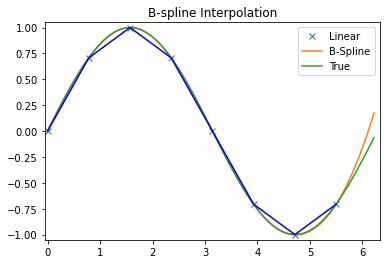

In [105]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate
x = np.arange(0, 2*np.pi, 2*np.pi/8)
y = np.sin(x)
spline = interpolate.splrep(x, y, s=0) #x and y positonal arguments, smoothing condition is = 0, degree = 3 (built-in) 
xnew = np.arange(0, 2*np.pi, np.pi/50)
ynew = interpolate.splev(xnew, spline, der=0)
plt.figure()
plt.plot(x, y,'x', xnew, ynew, xnew, np.sin(xnew), x, y, 'b')
plt.legend(['Linear', 'B-Spline', 'True'])
plt.axis([-0.05, 6.33, -1.05, 1.05])
plt.title('B-spline Interpolation')
plt.show()


## B-Spline Interpolation Code
This code is constructed from the two main equations necessary for B-spline interpolation: the B-spline smoothing function given by 

$\begin{equation} B_i^d(x) = \frac{x - t_i}{t_{i+d} - t_i}B_i^{d-1}(x) + \frac{t_{i+d+1} - x}{t_{i+d+1} - t_{i+1}}B_{i+1}^{d-1}(x) \end{equation}$,

and the interpolation function defined by the smoothing function multiplied by the control points

$f(x) = \sum_ic_i^dB_i^d(x)$.

In [142]:
def B(x, k, i, t):
   if k == 0:
      return 1.0 if t[i] <= x < t[i+1] else 0.0 #prevent negative numbers error
   if t[i+k] == t[i]:
      h1 = 0.0 #prevent divide by zero error
   else:
      h1 = (x - t[i])/(t[i+k] - t[i]) * B(x, k-1, i, t)
   if t[i+k+1] == t[i+1]:
      h2 = 0.0 #prevent divide by zero error
   else:
      h2 = (t[i+k+1] - x)/(t[i+k+1] - t[i+1]) * B(x, k-1, i+1, t)
   return h1 + h2


def bspline(x, t, c, k):
   n = len(t) - k - 1 #define control points
   assert (n >= k+1)  #k + 1 control points is required for any k 
   return sum(c[i] * B(x, k, i, t) for i in range(n))

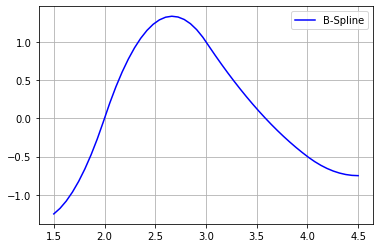

In [143]:
import matplotlib.pyplot as plt
import numpy as np
k = 2
t = [0, 1, 2, 3, 4, 5, 6]
c = [-2, 2, 0, -1, -1]
fig, ax = plt.subplots()
xnew = np.linspace(1.5, 4.5, 50)
ax.plot(xnew, [bspline(x, t, c, k) for x in xx], 'b-', label='B-Spline')
ax.grid(True)
ax.legend(loc='best')
plt.show()

## Application of B-spline Interpolation
### NURBS
**NURBS**, or Non-Uniform Rational B-Splines, is an application of B-splines relevant to computer graphics programs. The program is used in CAD, CAM, and CAE programs to assist in curve and shape modeling. The shapes of the surfaces are mapped out by control points, indicated in the images as circular points connected by straight lines. Through manipulation of knots and control points, different shapes are curves can be evaluated. NURBS is an accurate way to depict both standard geometry and free-form geometry such as cars and human bodies. Through the use of B-splines, the amount of information needed to generate these bodies is less than that of any other method. Understanding the degree, knots, and control points allows for the manipulation of the desired geometry.   


 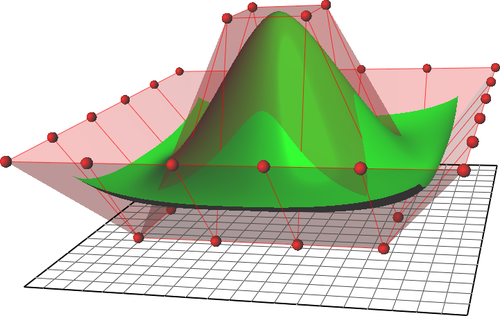!